In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [3]:
x,y=make_moons(n_samples=1000,noise=0.2)

In [4]:
df={"x1":x[:,0],"x2":x[:,1],"y":y}
dataset=pd.DataFrame(df)
dataset

,x1,x2,y
0,0.085206,1.034018,0
1,1.425858,-0.148660,1
2,-0.225152,0.965165,0
3,-0.081765,1.024477,0
4,-1.086765,0.721168,0
...,...,...,...
995,1.206600,-0.838414,1
996,0.991194,-0.032989,0
997,1.783642,-0.049508,1
998,1.708824,-0.305376,1


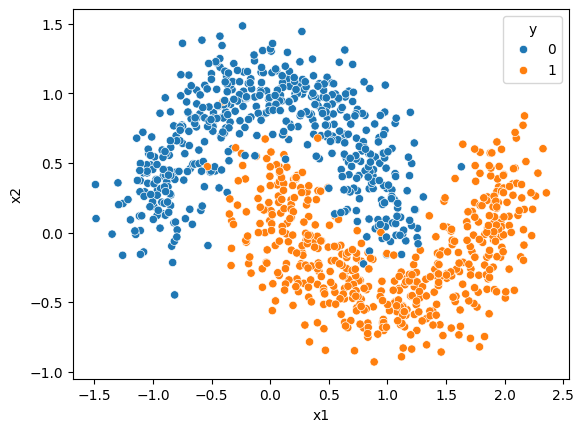

In [5]:
import seaborn as sns
sns.scatterplot(x="x1", y="x2", data=dataset,hue="y")
plt.show()


In [6]:
x_a=dataset.iloc[:,:-1]
y_a=dataset["y"]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_a, y_a, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [9]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(100.0, 96.5)

In [10]:
sv=SVC()
sv.fit(x_train, y_train)
sv.score(x_train, y_train)*100, sv.score(x_test, y_test)*100


(97.875, 96.5)

In [11]:
gnb=GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train)*100, gnb.score(x_test, y_test)*100


(87.0, 83.5)

In [20]:
from sklearn.ensemble import VotingClassifier
li=[("dt1", DecisionTreeClassifier()), ("sv1",SVC()), ("gnb1", GaussianNB())]
vc=VotingClassifier(li, weights=[10,4,7])
vc.fit(x_train, y_train)


VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[10, 4, 7])

In [21]:
vc.score(x_train, y_train)*100, vc.score(x_test, y_test)*100

(98.375, 95.5)

In [24]:
#to check if it really gives best accuracy:
prd={"dt":dt.predict(x_test), "svm":sv.predict(x_test), "gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,0,1
4,1,1,1,1
...,...,...,...,...
195,1,1,0,1
196,0,0,0,0
197,1,1,1,1
198,1,1,1,1
